# DFS(Depth First Search) 깊이 우선 탐색
- 하나의 경우의 수에 대하여 모든 경우의 수를 조사하고 다음 경우의 수를 조사하면서 해를 찾는 과정

In [ ]:
while len(stack)>0:
    now = stack.pop()
    if now == dest: # 정답인지
        return True
    x = now[1]
    y = now[0]
    if x - 1 > -1 :             # 왼쪽
        if maps[y][x-1] == 0: 
            stack.append([y, x-1]) # stack에 갈수있는 길 표시
            maps[y][x-1]=2  # 방문 표시
    if x + 1 < hori:            # 오른쪽
        if maps[y][x+1]==1: 
            stack.append([y,x+1])
            maps[y][x+1]=2
    if y - 1 > -1:              # 아래
        if maps[y-1][x]==1: 
            stack.append([y-1,x])
            maps[y-1][x]=2
    if y + 1 < verti:           # 위
        if maps[y+1][x]==1: 
            stack.append([y+1, x])
            maps[y+1][x]=2
    return False

# BFS(Breadth First Search) 의 약자로 넓이 우선 탐색을 의미
- 하나의 경우의 수에 대한 다음 단계의 모든 경우의 수를 조사하면서 해를 찾는 과정

In [ ]:
while len(queue) > 0:
    count = len(queue) # 같은 거리에 있는 큐 데이터 갯수
    for time in range(count): # 같은 거리에 잇는 큐 갯수 만큼 검사
        now = queue.pop(0)
        if now == dest: # 정답 데이터
            return answer
        for i in data: # 연결된 포인트 완전 탐색
            if i[0] ==now and visited[i[0]-1]==False: # 방문하지 않은 연결된 길이라면 큐에 추가하고 방문 표시
                queue.append(i[1])
                visited[i[1]-1]=True
            elif i[1]==now and visited[i[0]-1]==False:
                queue.append(i[0])
                visited[i[0]-1]=True
    answer+=1 # 거리를 1 더 벌린다
return answer

# DFS와 BFS 문제 백준(1260)

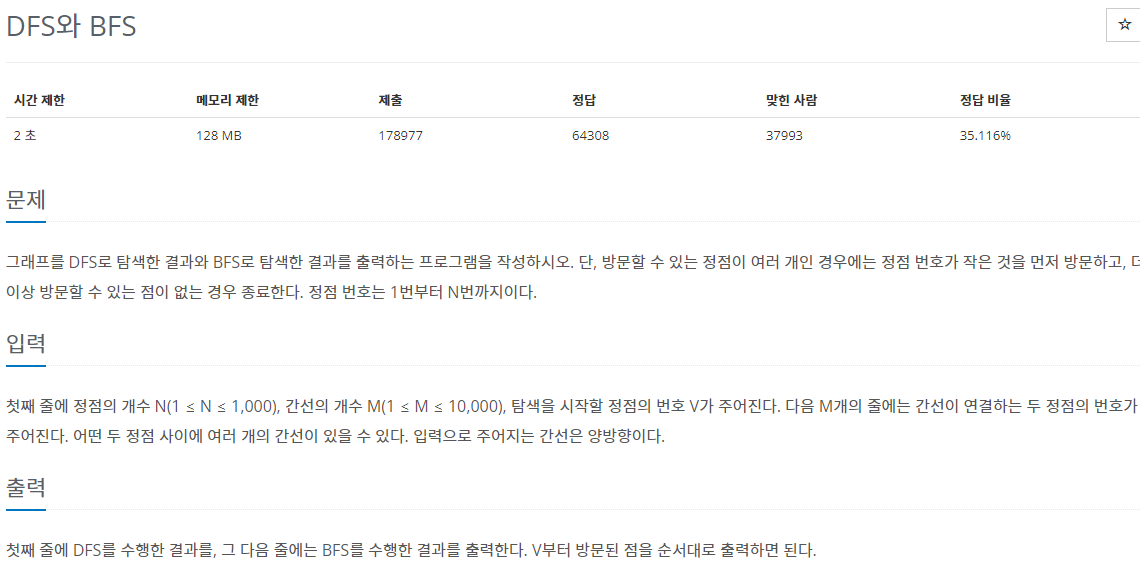

## 함수로 제작
- 방문한곳은 True로 안한곳은 False
- 이중 리스트로 검색

In [ ]:
# import sys
# input = sys.stdin.readline

def DFS(graph, start, visited):
    visited[start] = True
    print(start, end=' ')
    print(graph, start, visited)
    for i in graph[start]:
        if not visited[i]: # 방문 안했을시 재귀
            DFS(graph, i, visited)

def BFS(graph, start, visited):
    visited[start] = True # 시작한곳을 True 로 막고 시작
    lis1 = [start] # 방문 가능한곳 초기화
    while lis1:
        vertex = lis1.pop(0) # 첫번째 방문 가능한곳 가져오기
        print(vertex, end=" ")
        print(graph, vertex, visited)
        for num in graph[vertex]: # vertex에 있는 값을 다 불러옴.
            if not visited[num]:
                lis1.append(num)
                visited[num] = True

N, M, V = map(int,input().split()) # 노드의 수, 간선의수, 시작점

graph = {i:[] for i in range(N+1)} # 딕셔너리로 key을 N개 만큼 증가
# 딕셔너리로 한 이유는 dict가 리스트보다 읽어오는 속도가 더 빠르다.
graph[0] = [0] # 맨 첫번째 열을 0으로 설정.


for _ in range(M):
    start, end = map(int, input().split())
    graph[start].append(end) # 시작점 끝점 추가
    graph[end].append(start) # 서로 연결
    graph[start].sort()
    graph[end].sort()        # 낮은 숫자부터 찾기 위해 정렬

visited = [False for _ in range(N+1)]  # 방문한지 안한지 확인 위해 False로 초기화
DFS(graph, V, visited)

visited = [False for _ in range(N+1)]  # DFS로 변형되어서 False로 재 초기화
print()
BFS(graph, V, visited)

5 5 3
5 4
5 2
1 2
3 4
3 1
3 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 3 [False, False, False, True, False, False]
1 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 1 [False, True, False, True, False, False]
2 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 2 [False, True, True, True, False, False]
5 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 5 [False, True, True, True, False, True]
4 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 4 [False, True, True, True, True, True]

3 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 3 [False, False, False, True, False, False]
1 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 1 [False, True, False, True, True, False]
4 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 4 [False, True, True, True, True, False]
2 {0: [0], 1: [2, 3], 2: [1, 5], 3: [1, 4], 4: [3, 5], 5: [2, 4]} 2 [False, True, True, True, True, True]
5 

## 재출용 코드

In [ ]:
import sys
input = sys.stdin.readline

def DFS(graph, start, visited):
    visited[start] = True
    print(start, end=' ')
    for i in graph[start]:
        if not visited[i]:
            DFS(graph, i, visited)

def BFS(graph, start, visited):
    visited[start] = True 
    lis1 = [start]
    while lis1:
        vertex = lis1.pop(0) 
        print(vertex, end=" ")
        for num in graph[vertex]:
            if not visited[num]:
                lis1.append(num)
                visited[num] = True

N, M, V = map(int,input().split())

graph = {i:[] for i in range(N+1)}
graph[0] = [0]
visited = [False for _ in range(N+1)]

for _ in range(M):
    start, end = map(int, input().split())
    graph[start].append(end)
    graph[end].append(start)
    graph[start].sort()
    graph[end].sort()


DFS(graph, V, visited)

visited = [False for _ in range(N+1)]
print()
BFS(graph, V, visited)

# 바이러스 문제 백준(2606)

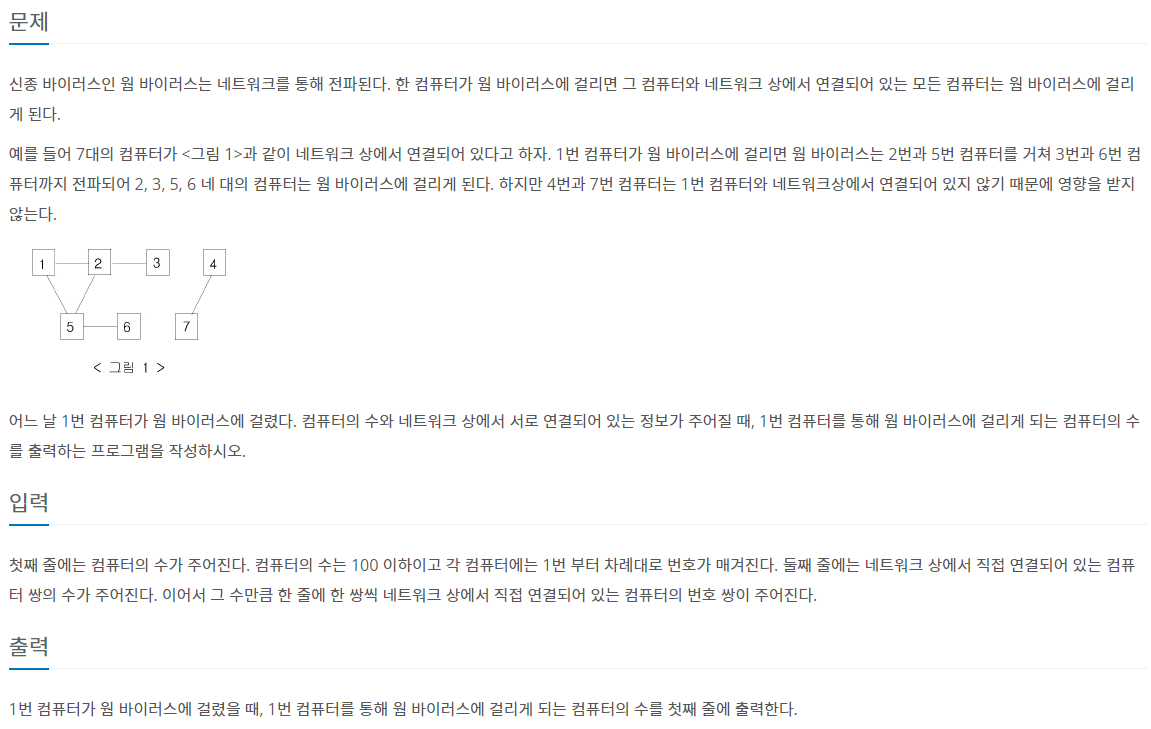

- DFS나 BFS나 속도가 똑같을 것 같다
- 연결이 안되어 있으면 감염이 안된것.
- 방문했을때 True로 바뀌면서 cnt 씩 증가
    - 첫번째(1)는 포함이 안되므로 0부터 시작
- DFS는 재귀라 건들기 힘들어
- BFS로 시도


In [ ]:
# import sys
# input = sys.stdin.readline


def BFS(graph, start, visited):
    visited[start] = True 
    lis1 = [start]
    cnt = 0                      # 위와 같지만 cnt라는 함수를 선언
    while lis1:
        print(f'lis1={lis1}')
        vertex = lis1.pop(0)
        print(f'graph={graph}, vertex={vertex}, visited={visited}, cnt={cnt}')
        for num in graph[vertex]:
            if not visited[num]:
                lis1.append(num)
                cnt += 1            # 방문시에 1씩 추가
                visited[num] = True
    return cnt                   # cnt 출력
com = int(input())
line = int(input())

graph = {i:[] for i in range(com+1)}
graph[0] = [0]
visited = [False for _ in range(com+1)]

for _ in range(line):
    start, end = map(int, input().split())
    graph[start].append(end)
    graph[end].append(start)
    graph[start].sort()
    graph[end].sort()

print(BFS(graph, 1, visited))

7
6
1 2
2 3
1 5
5 2
5 6
4 7
lis1=[1]
graph={0: [0], 1: [2, 5], 2: [1, 3, 5], 3: [2], 4: [7], 5: [1, 2, 6], 6: [5], 7: [4]}, vertex=1, visited=[False, True, False, False, False, False, False, False], cnt=0
lis1=[2, 5]
graph={0: [0], 1: [2, 5], 2: [1, 3, 5], 3: [2], 4: [7], 5: [1, 2, 6], 6: [5], 7: [4]}, vertex=2, visited=[False, True, True, False, False, True, False, False], cnt=2
lis1=[5, 3]
graph={0: [0], 1: [2, 5], 2: [1, 3, 5], 3: [2], 4: [7], 5: [1, 2, 6], 6: [5], 7: [4]}, vertex=5, visited=[False, True, True, True, False, True, False, False], cnt=3
lis1=[3, 6]
graph={0: [0], 1: [2, 5], 2: [1, 3, 5], 3: [2], 4: [7], 5: [1, 2, 6], 6: [5], 7: [4]}, vertex=3, visited=[False, True, True, True, False, True, True, False], cnt=4
lis1=[6]
graph={0: [0], 1: [2, 5], 2: [1, 3, 5], 3: [2], 4: [7], 5: [1, 2, 6], 6: [5], 7: [4]}, vertex=6, visited=[False, True, True, True, False, True, True, False], cnt=4
4


## 재출용 코드

In [ ]:
import sys
input = sys.stdin.readline


def BFS(graph, start, visited):
    visited[start] = True 
    lis1 = [start]
    cnt = 0
    while lis1:
        vertex = lis1.pop(0)
        for num in graph[vertex]:
            if not visited[num]:
                lis1.append(num)
                cnt += 1
                visited[num] = True
    return cnt
com = int(input())
line = int(input())

graph = {i:[] for i in range(com+1)}
graph[0] = [0]
visited = [False for _ in range(com+1)]

for _ in range(line):
    start, end = map(int, input().split())
    graph[start].append(end)
    graph[end].append(start)
    graph[start].sort()
    graph[end].sort()

print(BFS(graph, 1, visited))

# 타겟넘버 코딩테스트(43165)

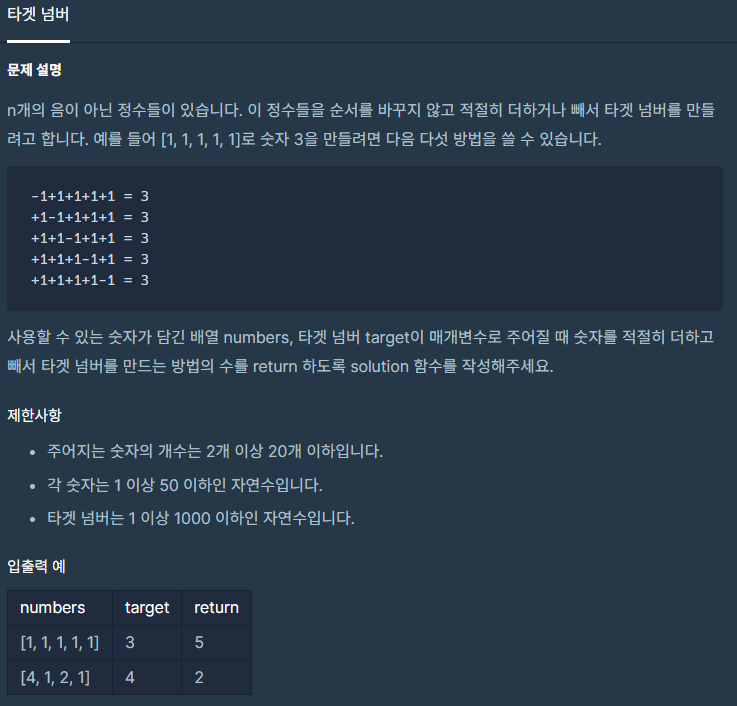

- 전체를 더한다음 하나씩 숫자를 뺀다. 만약 target 과 같아지면 +1
- target 보다 작아지면 target 전의 값으로 돌아가 다음 리스트 검색

In [ ]:
def DFS(numbers, target, idx, pos_neg):
    if idx == len(numbers):
        if target == pos_neg:
            return 1
        return 0
    ans = 0 + DFS(numbers, target, idx+1, pos_neg+numbers[idx]) # +일때 재귀로 반복
    return ans + DFS(numbers, target, idx+1, pos_neg-numbers[idx]) # 양수일때와 음수일때 값 합해서 출력
    

def solution(numbers, target):
    return DFS(numbers, target, 0, 0)

2

In [ ]:
solution([4, 1, 2 ,1], 4)

numbers : [-1, 1, 1, 1, 1], save : [-1, 1, 1, 1, 1] ,answer : 1
numbers : [-1, -1, 1, 1, 1], save : [-1, -1, 1, 1, 1] ,answer : 1
numbers : [-1, -1, -1, 1, 1], save : [-1, -1, -1, 1, 1] ,answer : 1
numbers : [-1, -1, -1, -1, 1], save : [-1, -1, -1, -1, 1] ,answer : 1
numbers : [-1, -1, -1, -1, -1], save : [-1, -1, -1, -1, -1] ,answer : 1


1